In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
#uploading the data 
from google.colab import files
uploaded=files.upload()

Saving my_movies.csv to my_movies.csv


In [ ]:
my_movies=pd.read_csv('my_movies.csv')
my_movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


Basic &EDA

In [ ]:
movies=my_movies.iloc[:,5:]
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [ ]:
movies.shape

(10, 10)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [ ]:
movies.isna().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [ ]:
movies.duplicated()

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool

In [ ]:
for i in movies.columns:
  print('\n Number of unique oservations in',movies[i].name,':',len(movies[i].unique()))
  print(' \n Different observations with count in ',movies[i].name,':\n',movies[i].value_counts())
  print('------------------------------------------------------------------')


 Number of unique oservations in Sixth Sense : 2
 
 Different observations with count in  Sixth Sense :
 1    6
0    4
Name: Sixth Sense, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in Gladiator : 2
 
 Different observations with count in  Gladiator :
 1    7
0    3
Name: Gladiator, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in LOTR1 : 2
 
 Different observations with count in  LOTR1 :
 0    8
1    2
Name: LOTR1, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in Harry Potter1 : 2
 
 Different observations with count in  Harry Potter1 :
 0    8
1    2
Name: Harry Potter1, dtype: int64
------------------------------------------------------------------

 Number of unique oservations in Patriot : 2
 
 Different observations with count in  Patriot :
 1    6
0    4
Name: Patriot, dtype: int64
--

In [ ]:
movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
movie_counts=pd.DataFrame(movies.sum()).reset_index()
movie_counts.rename(columns={'index':'movie_geners',0:'count'},inplace=True)
movie_counts=movie_counts.sort_values('count',ascending=False).reset_index()
movie_counts=movie_counts.drop('index',axis=1)
movie_counts

,movie_geners,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


Visulization of data points

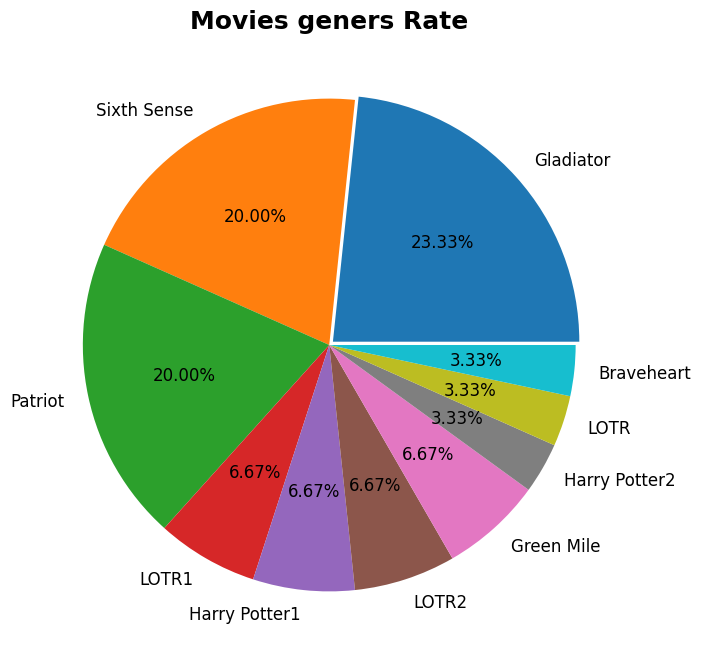

In [ ]:
plt.figure(figsize = (8,8))
plt.pie(movie_counts['count'], labels= movie_counts['movie_geners'],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', textprops = {'size': 12})
plt.title("Movies geners Rate", fontsize = 18, fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Movie Geners Frequency')

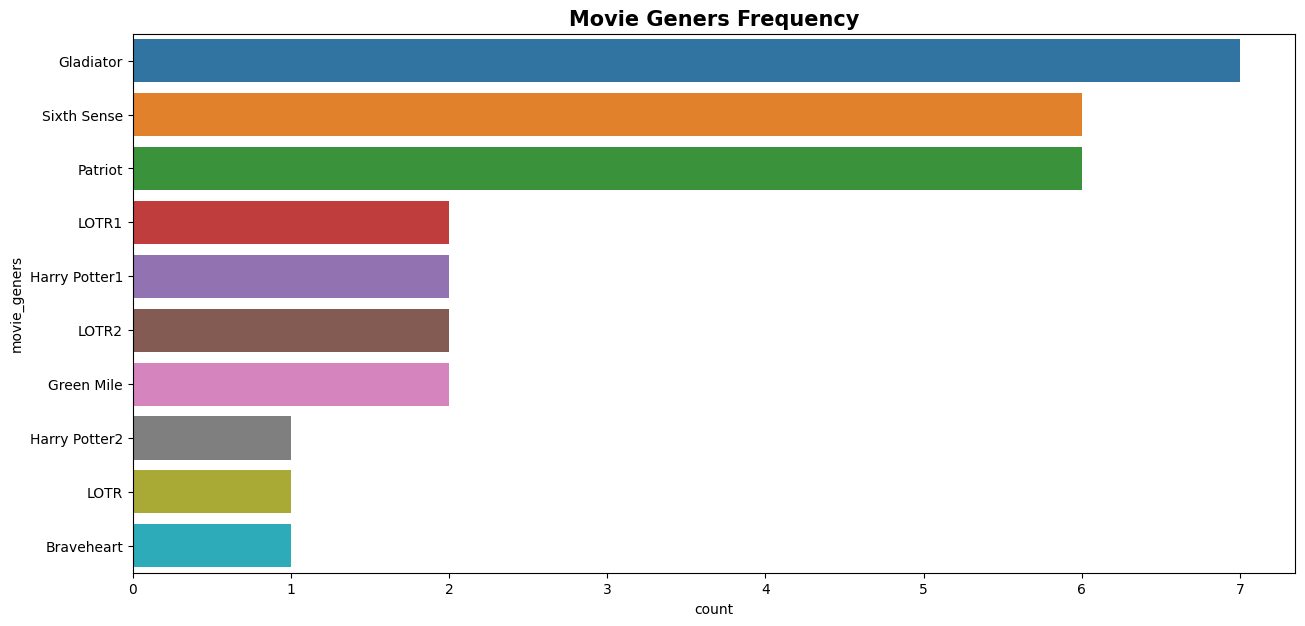

In [ ]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x = 'count', y = 'movie_geners', data= movie_counts)
plt.title('Movie Geners Frequency',  fontsize = 15, fontweight = 'bold')

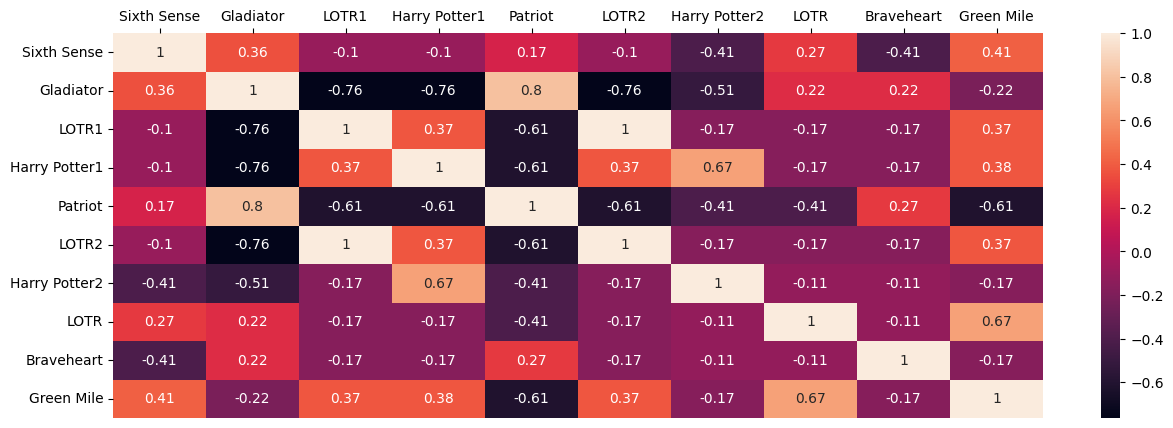

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(15,5))
ax = sns.heatmap(movies.corr(), annot=True)
ax.xaxis.tick_top()

Apriori Algorithm


Trail-1
Support 20% Confidence 40%

In [ ]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets1=apriori(movies,min_support=0.20,use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Green Mile, Sixth Sense)"


In [ ]:
rules1=association_rules(frequent_itemsets1,metric="lift",min_threshold=0.4)
rules1_sorted=rules1.sort_values('lift',ascending=False)
rules1_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
15,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


In [ ]:
rules1_sorted.iloc[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
15,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


Text(0.5, 0, 'lift')

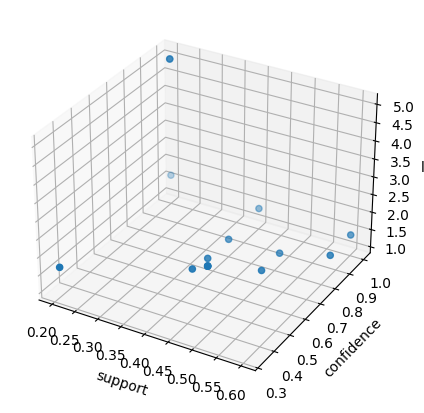

In [ ]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules1_sorted['support'],rules1_sorted['confidence'],rules1_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

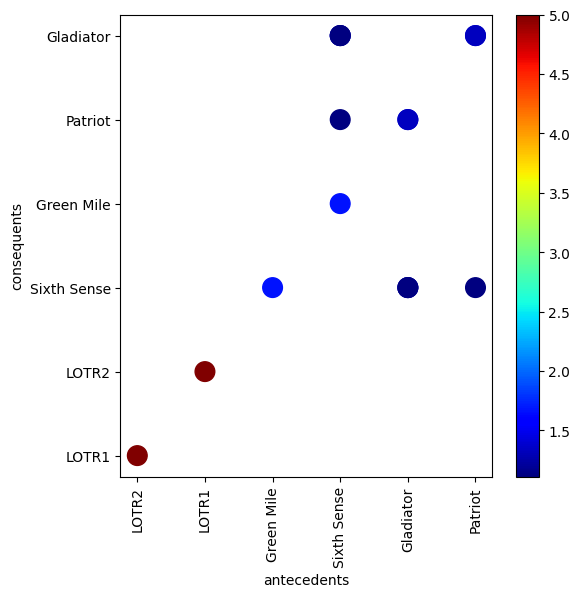

In [ ]:
X = rules1_sorted.antecedents
Y = rules1_sorted.consequents
Z = rules1_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

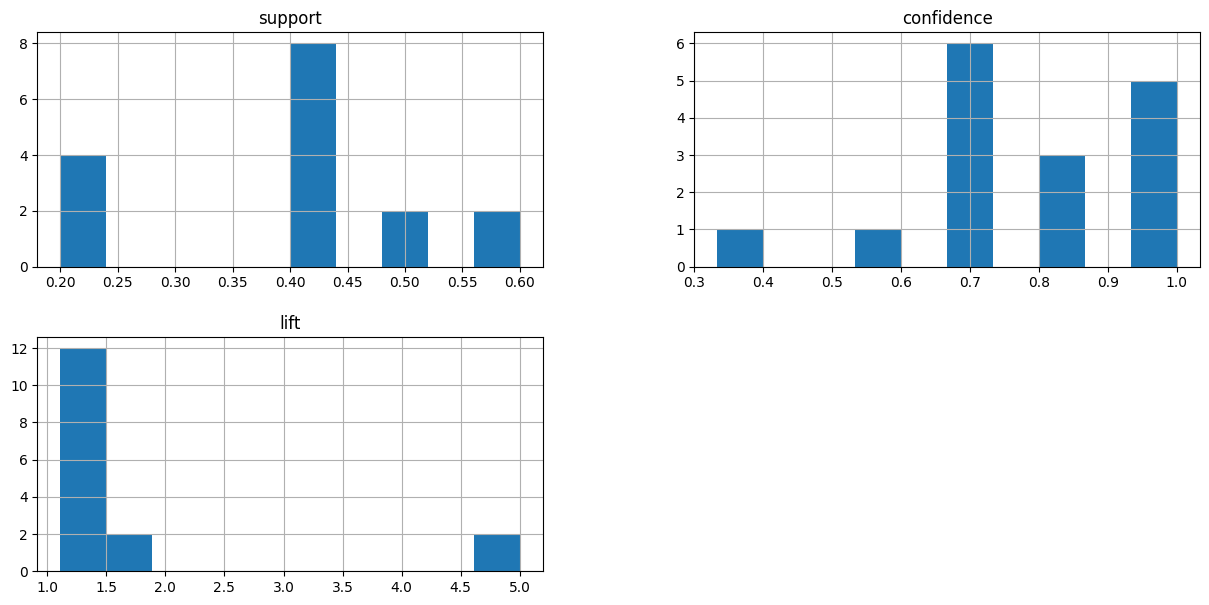

In [ ]:
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

Trail-2
Support 30% Confidence-50%

In [ ]:
frequent_itemsets2=apriori(movies,min_support=0.30,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Sixth Sense, Patriot)"


In [ ]:
rules2=association_rules(frequent_itemsets2,metric="lift",min_threshold=0.5)
rules2_sorted=rules2.sort_values('lift',ascending=False)
rules2_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
11,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [ ]:
rules2_sorted.iloc[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
11,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


Text(0.5, 0, 'lift')

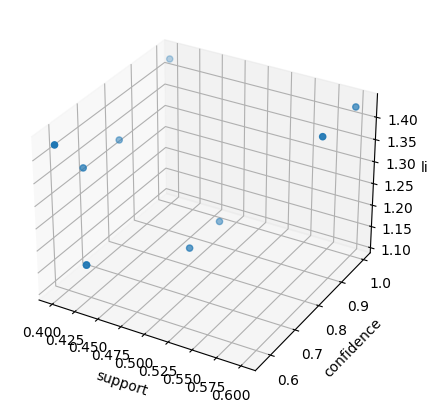

In [ ]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules2_sorted['support'],rules2_sorted['confidence'],rules2_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")
     

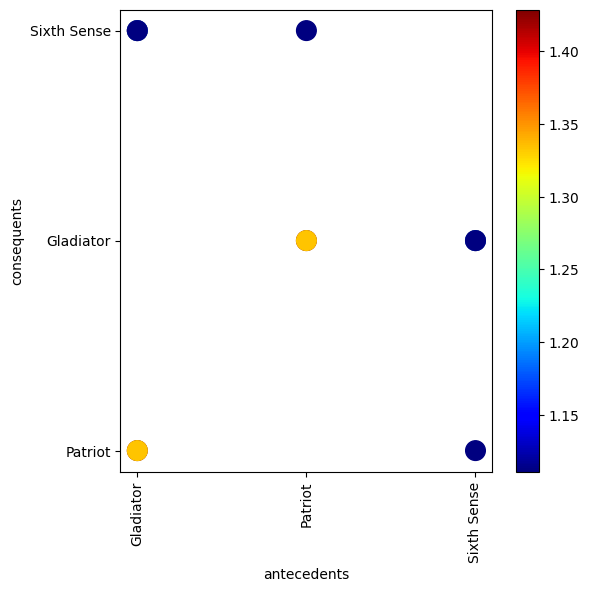

In [ ]:
X = rules2_sorted.antecedents
Y = rules2_sorted.consequents
Z = rules2_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()
     

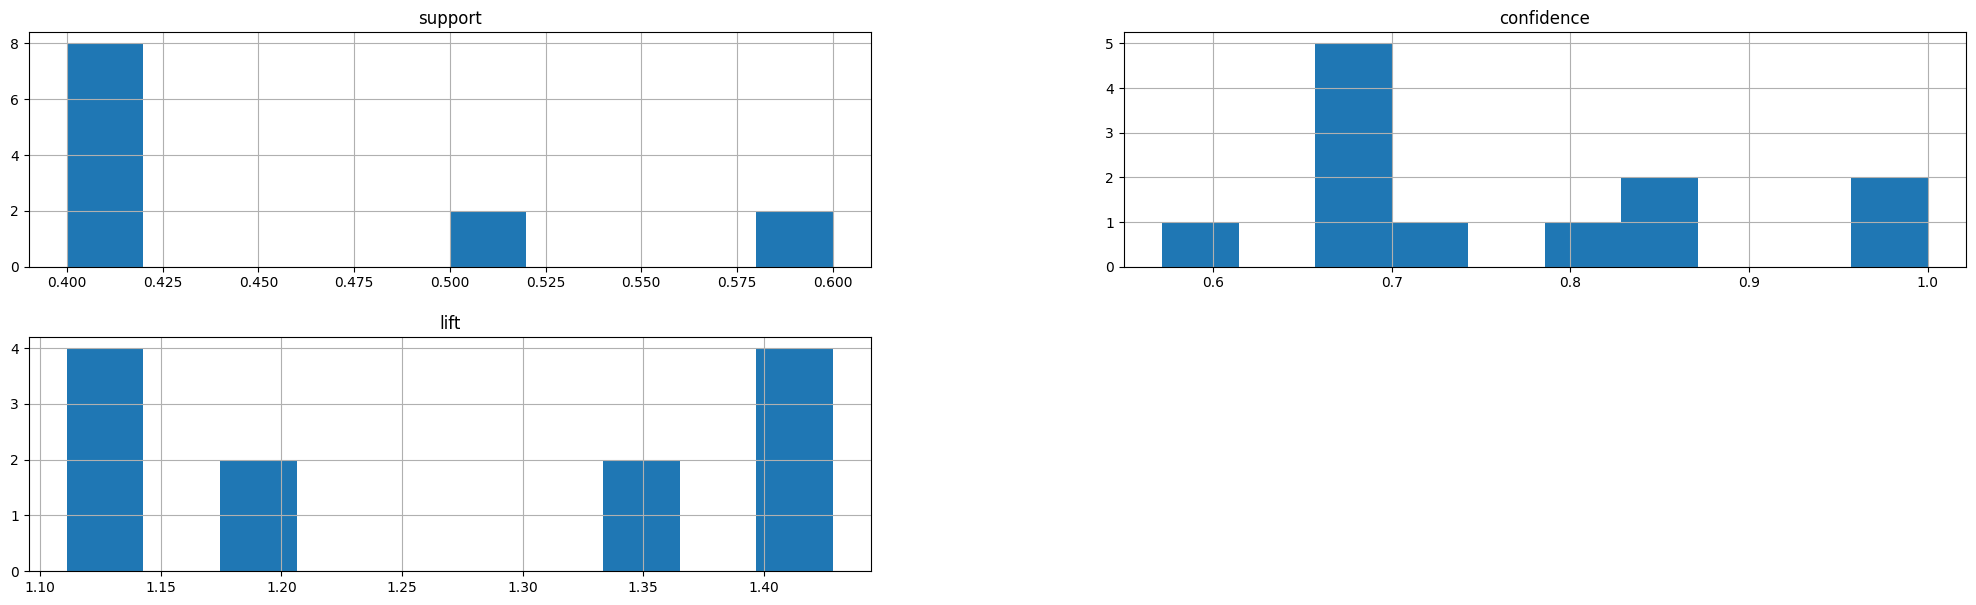

In [ ]:
rules2[['support','confidence','lift']].hist(figsize=(25,7))
plt.show()

Trail-3
Support 40% Confidence 60%

In [ ]:
frequent_itemsets3=apriori(movies,min_support=0.40,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Sixth Sense, Patriot)"


In [ ]:
rules3=association_rules(frequent_itemsets3,metric="lift",min_threshold=0.6).reset_index()
rules3_sorted=rules3.sort_values('lift',ascending=False)
rules3_sorted
     

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,8,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,9,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
6,6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
11,11,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
1,1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [ ]:
rules3_sorted.iloc[0:10]

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,8,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,9,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
6,6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
11,11,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
1,1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


Text(0.5, 0, 'lift')

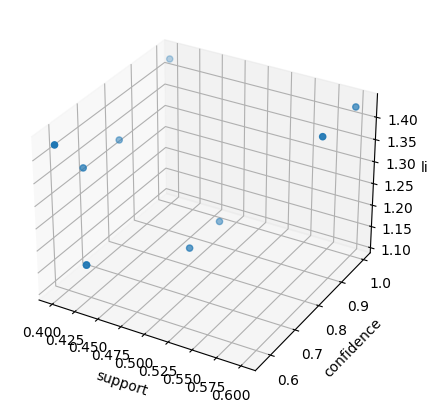

In [ ]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules3_sorted['support'],rules3_sorted['confidence'],rules3_sorted['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

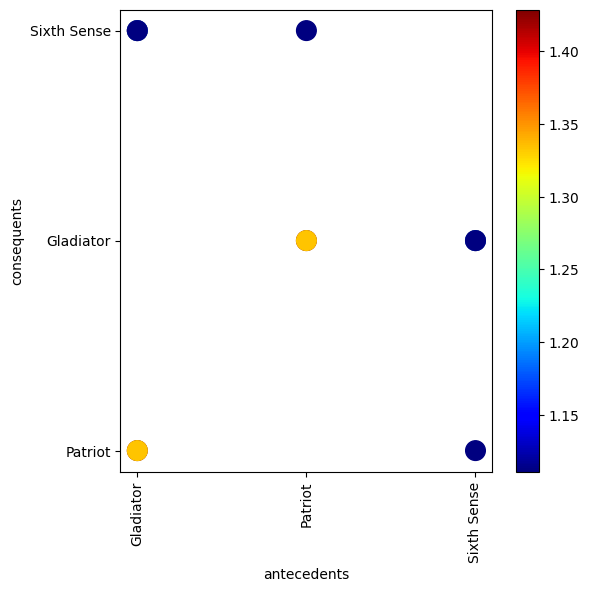

In [ ]:
X = rules3_sorted.antecedents
Y = rules3_sorted.consequents
Z = rules3_sorted.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

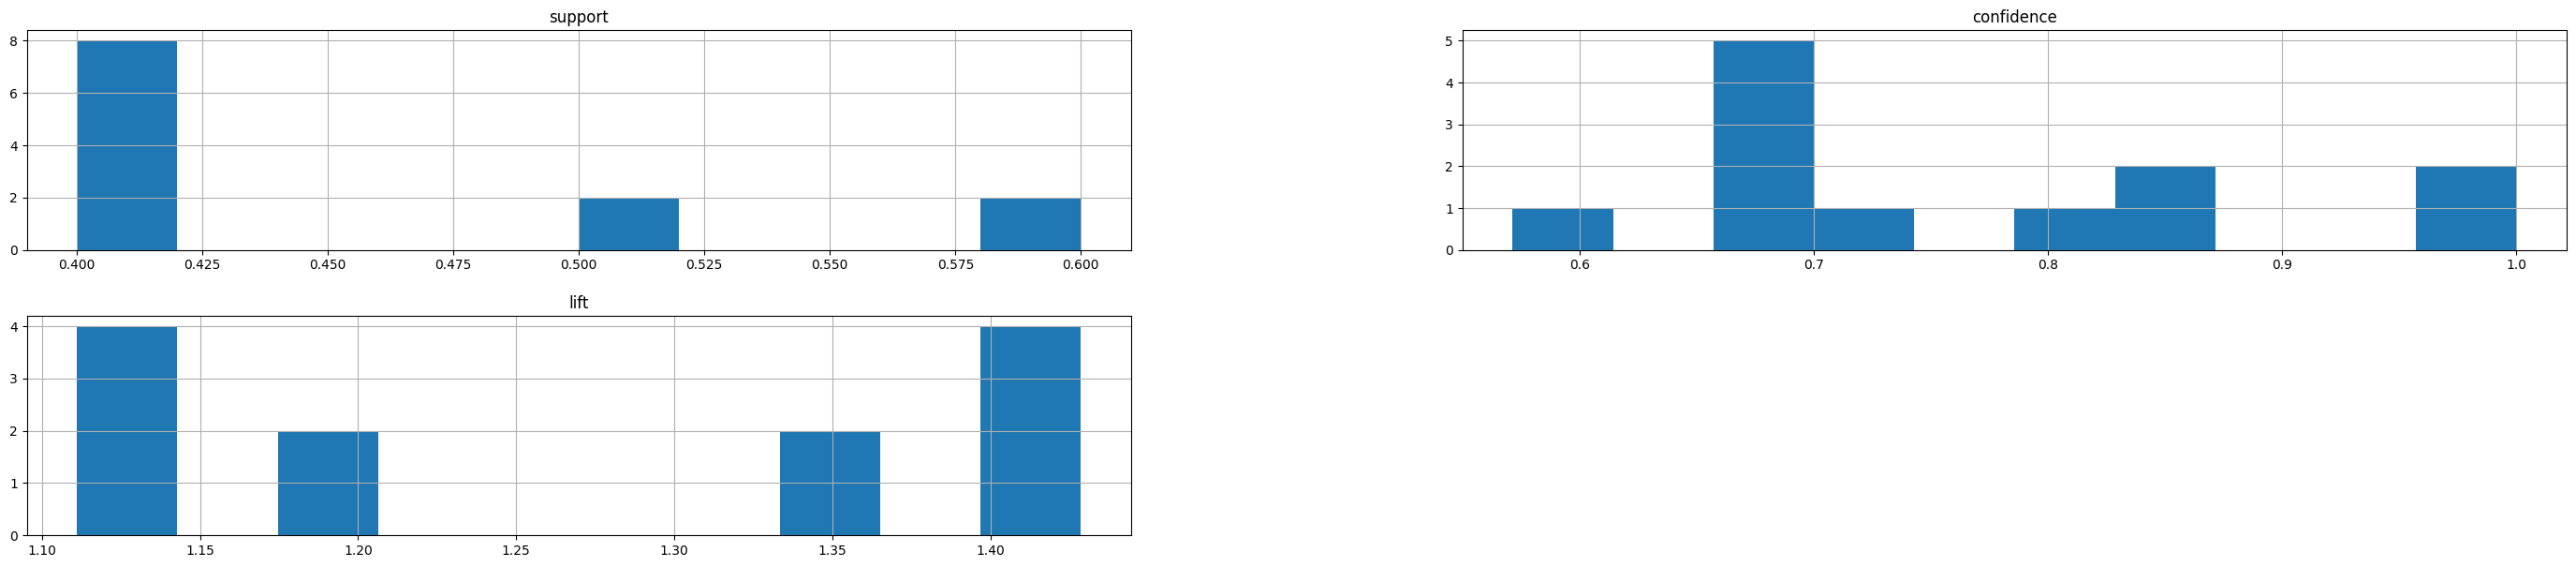

In [ ]:
rules3[['support','confidence','lift']].hist(figsize=(35,7))
plt.show()

Conclusion

In [ ]:
def lift_plot(table):
  plt.figure(figsize=(3,3), dpi= 300)
  sns.heatmap(table.pivot('antecedents','consequents','lift'), annot=True)
  plt.title('HeatMap - Antecedents,Consequents and Lift -Matrix',fontsize= 15)
  plt.yticks(rotation=0, fontsize= 5)
  plt.xticks(rotation=40, fontsize= 5)
  plt.show()
     

 Trail1 support = 20%,confidence=40%


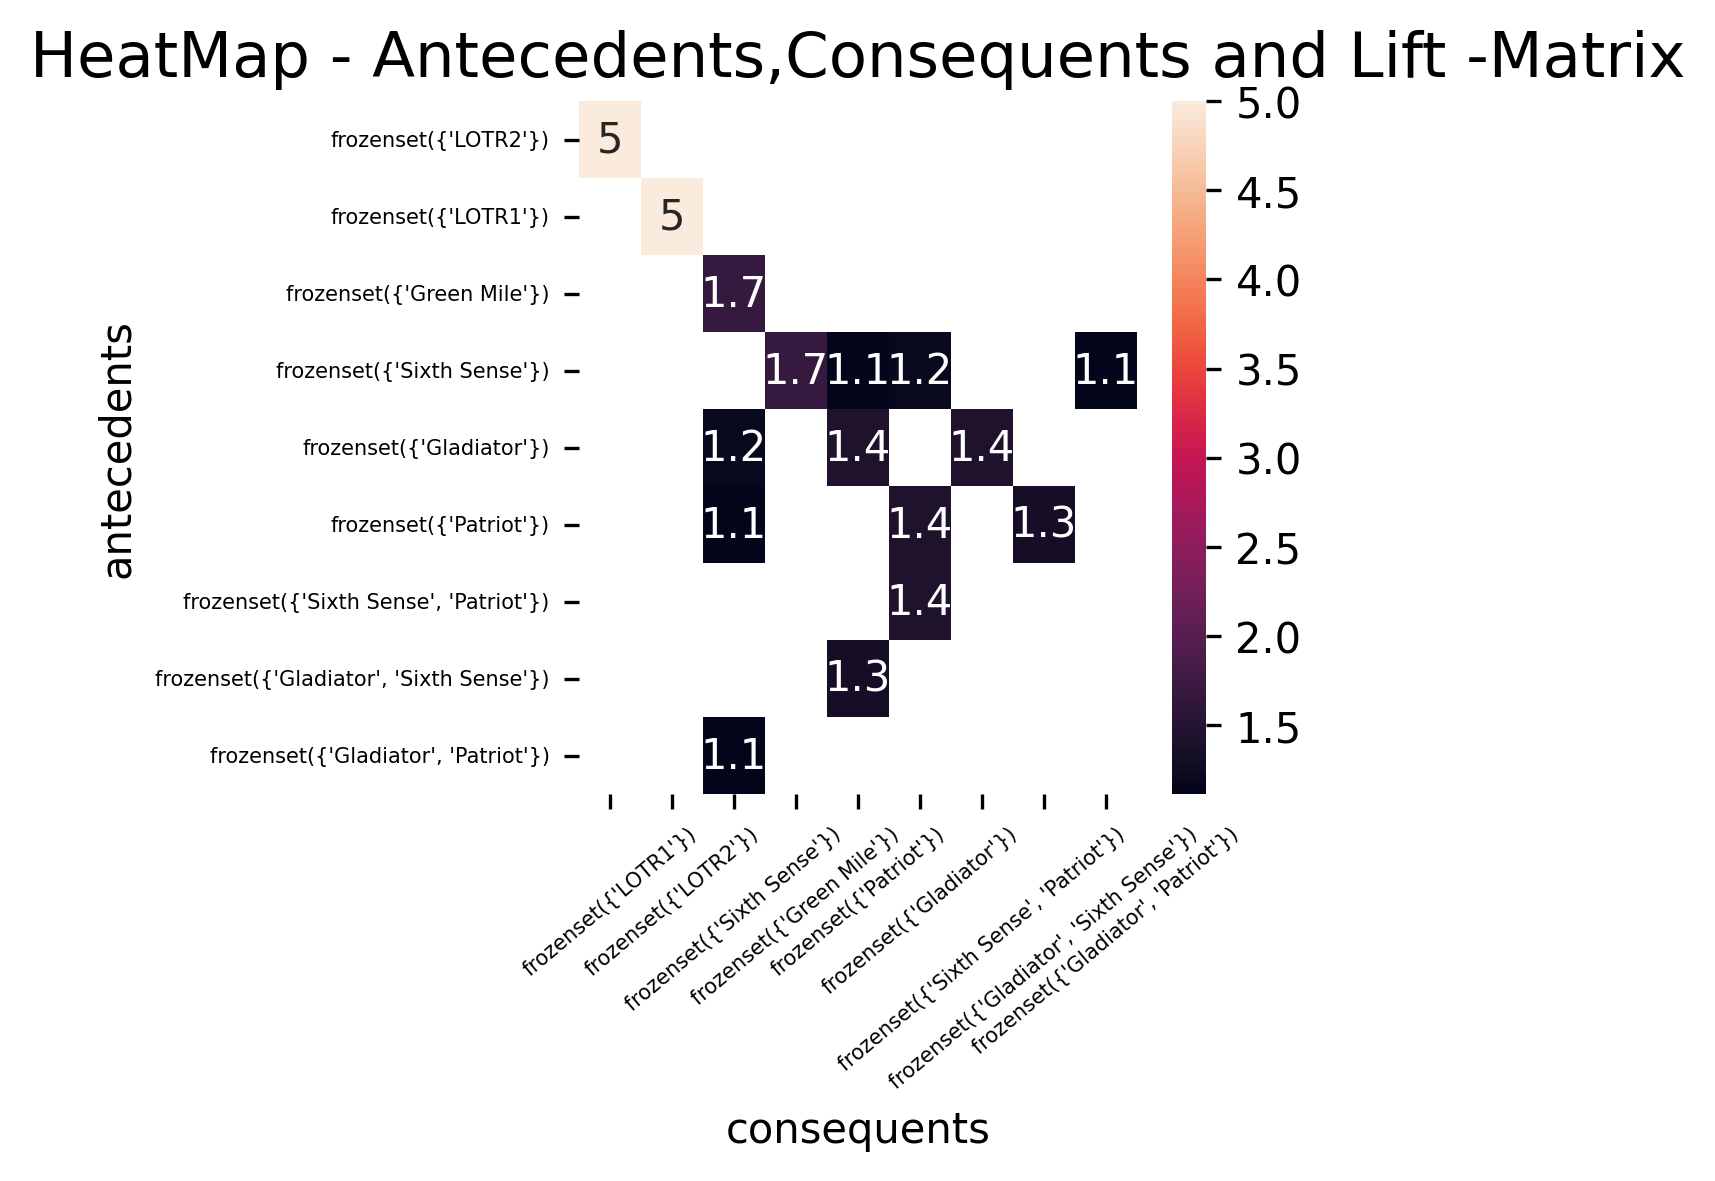


 Trail2 support = 30%,confidence=50%


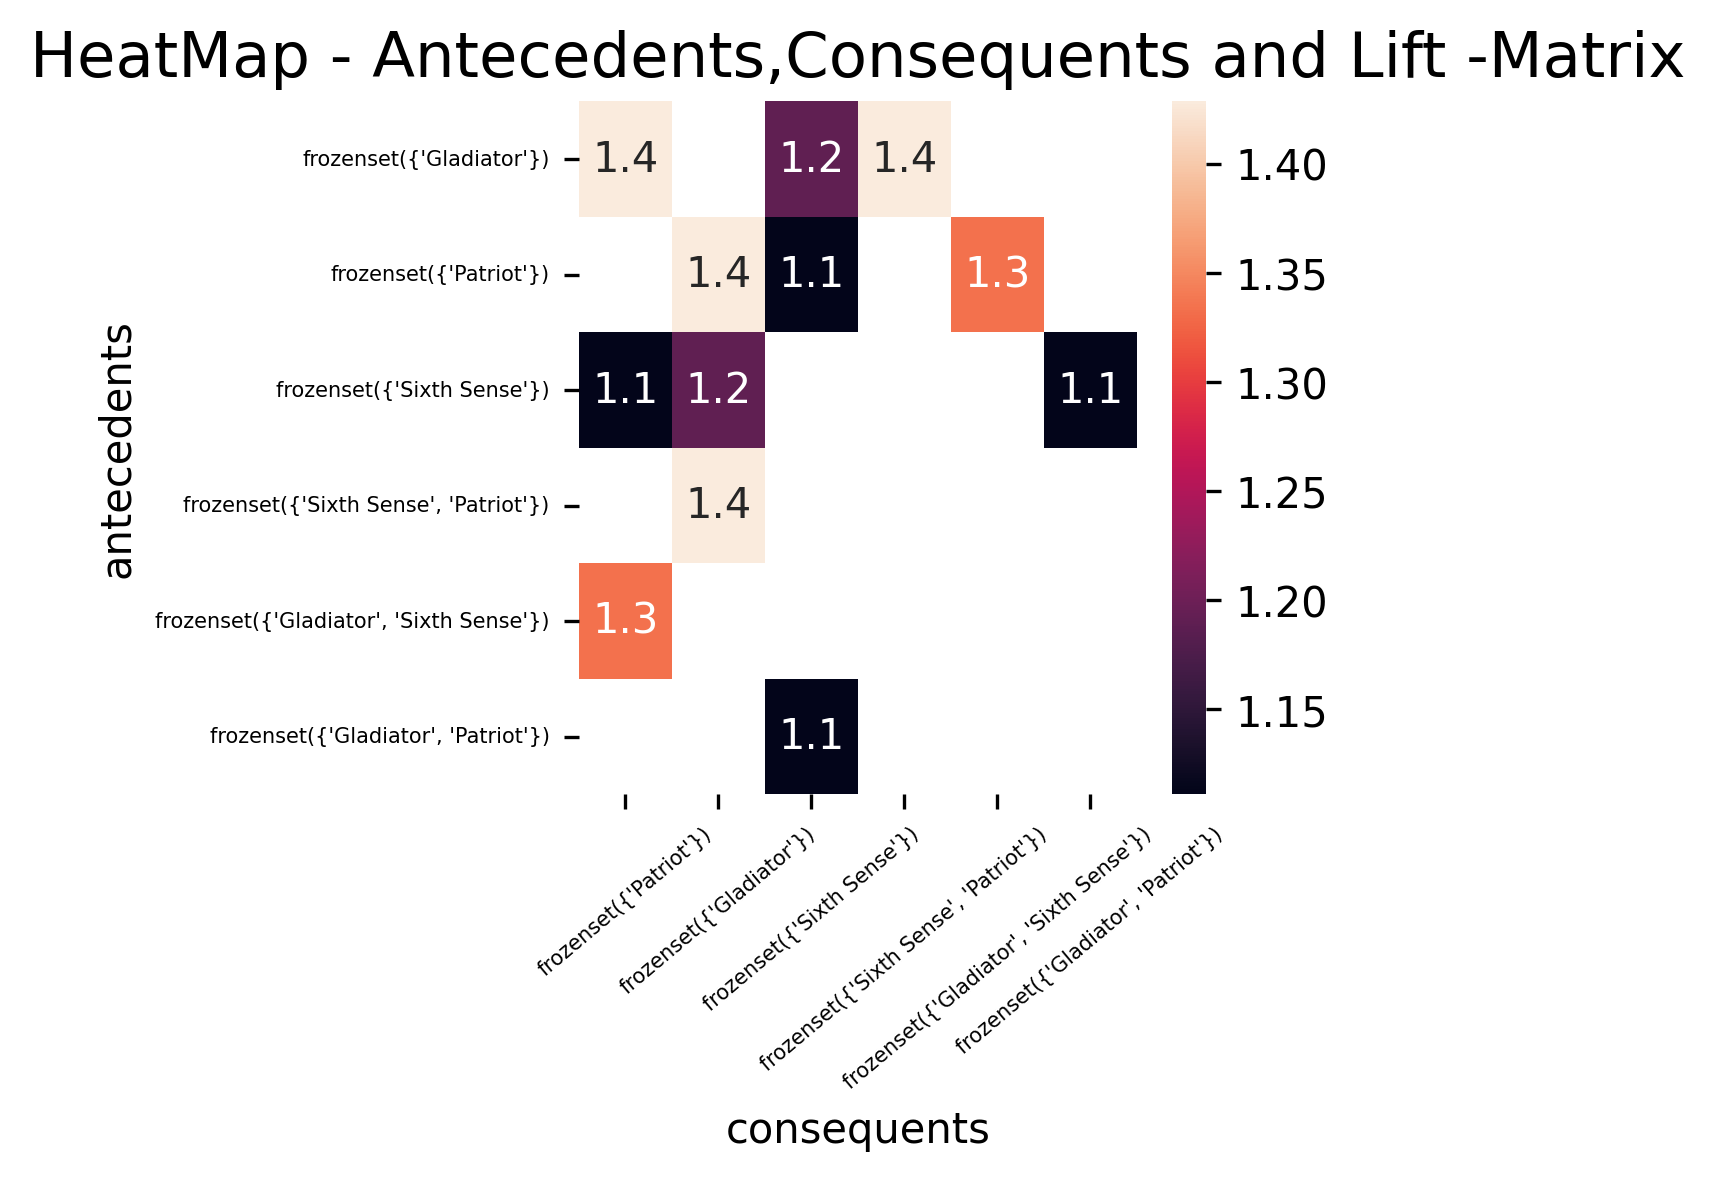


 Trail3 support = 40%,confidence=60%


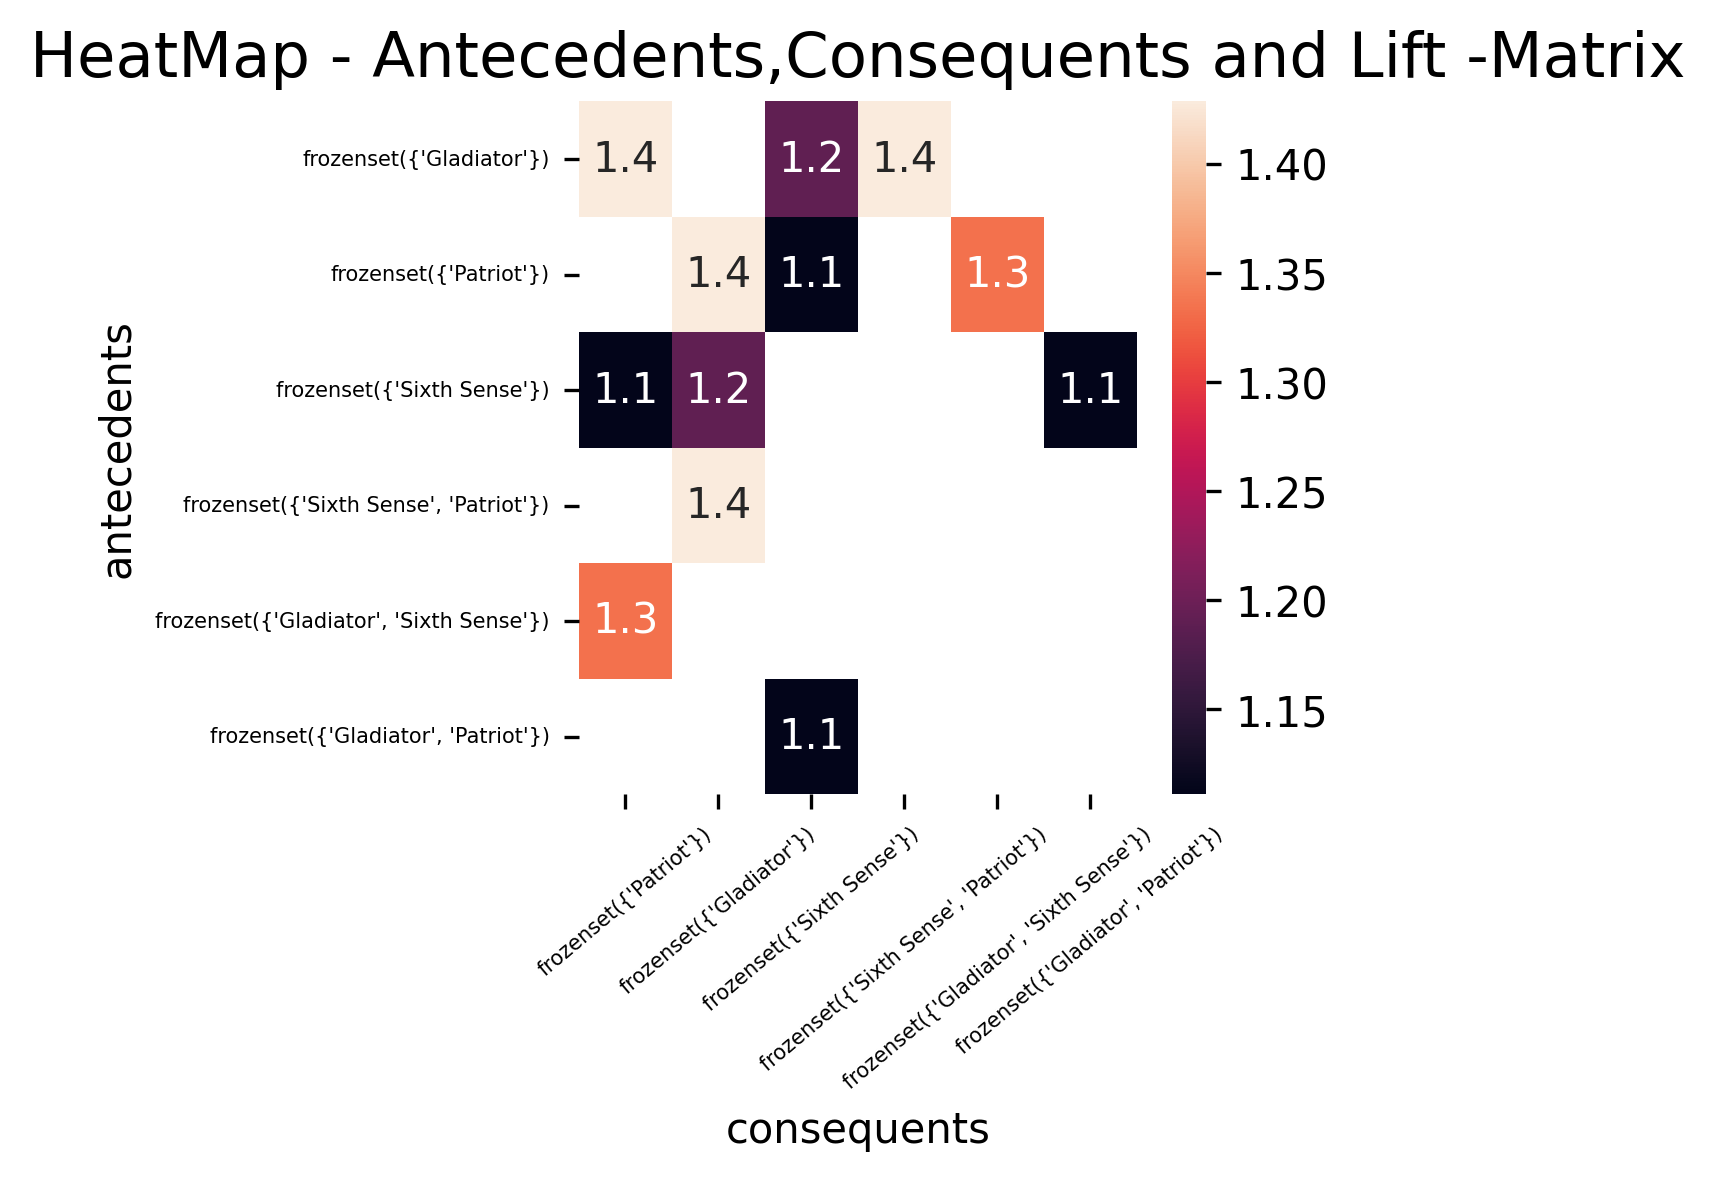

In [ ]:
print(' Trail1 support = 20%,confidence=40%')
lift_plot(rules1_sorted)
print('\n Trail2 support = 30%,confidence=50%')
lift_plot(rules2_sorted)
print('\n Trail3 support = 40%,confidence=60%')
lift_plot(rules3_sorted)

*Trial-1 is giving a good and acceptable association
*Trail-2 and Trail-3 are giving almost same association